### Student Information
Name: Kanokphan Thananchai (柯諾潘)

Student ID: 112065431

GitHub ID: hedgehog-menn

Kaggle name: Kanokphan Thananchai

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

# Table of contents
- [Take Home Exercise](#takehome)
     - [Exercise 1](#exercise1)
     - [Exercise 2](#exercise2)
     - [Exercise 3](#exercise3)
     - [Exercise 4]
     - [Exercise 5]
     - [Exercise 6]
     - [Exercise 7]
     - [Exercise 8]

# Take Home Exercise <a name="takehome"></a>

In [2]:
### Prerequisite ###
import pandas as pd

# Use os.path to support running from different OS
from os import path

# training data
anger_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'anger-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
sadness_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'sadness-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
fear_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'fear-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
joy_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'joy-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])

# testing data
anger_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'anger-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
sadness_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'sadness-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
fear_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'fear-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
joy_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'joy-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
## Exercise 1 <a name="exercise1"></a>
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [3]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer

# For `train_df`
count_vect = CountVectorizer()
train_count = count_vect.fit_transform(train_df.text)   # - Learn vocabulary and return document-term matrix - #

# For `test_dt`
count_vect_1 = CountVectorizer()
test_count = count_vect_1.fit_transform(test_df.text)   # - Learn vocabulary and return document-term matrix - #

In [4]:
# Take a look at data
train_df.text

3214    @Nataliem55 sadly, war has often been the fact...
509     @HuffPostUK  NO greater wrath than a woman sco...
2230    The T.I / Shawty Lo beef is one of the more un...
1832    After Nawaz Sharif's speech on terrorism, Kejr...
3279    @Janet_Reid Wonderful post! Novelists shouldn'...
                              ...                        
594          #welfarereform should not be a 'model' for .
2491    Check out this #film Robocoq 301 #animated #sh...
485     And she got all angry telling me 'but what wou...
3088    Some of these people at this protest are just ...
1867        ok, ok.. I know.. my last tweet was #terrible
Name: text, Length: 3613, dtype: object

In [5]:
# Check type of data
type(count_vect.get_feature_names_out())

numpy.ndarray

In [6]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Top 30 words frequenct in training data')

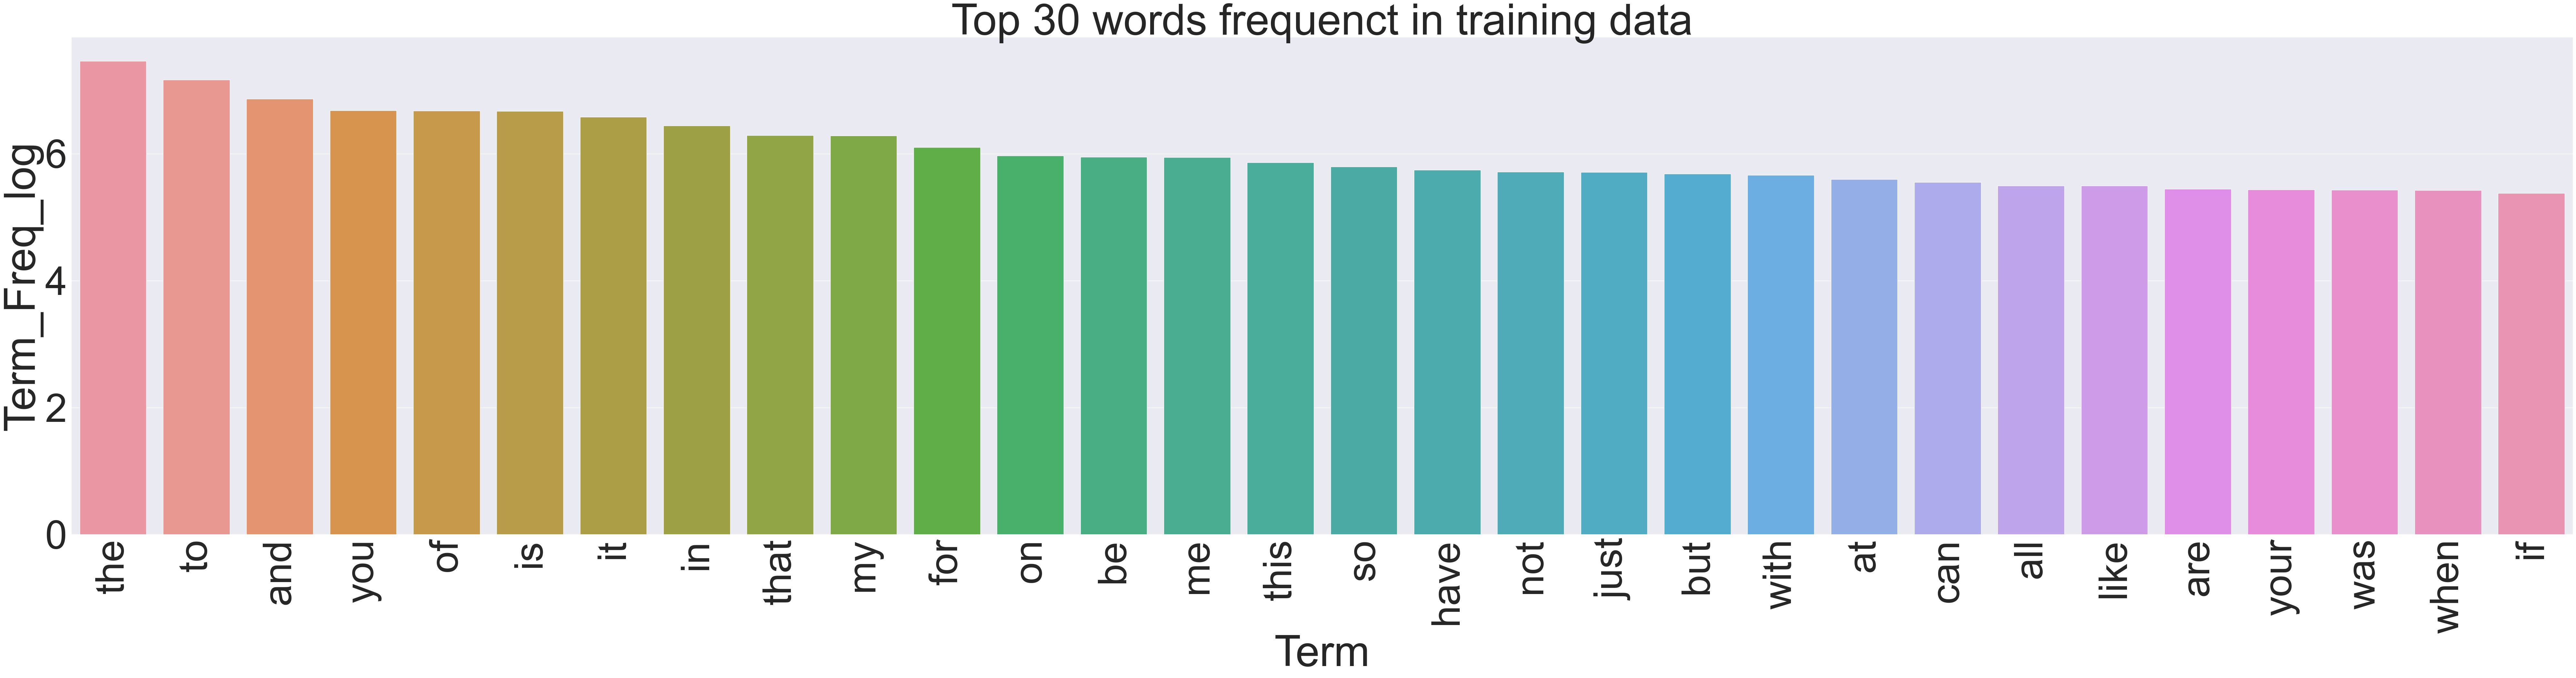

In [7]:
# Term Frequency for *** Training data ***
term_freq_train = np.asarray(train_count.sum(axis=0))[0]
term_freq_train_log = [math.log(i) for i in term_freq_train]   # for sns.barplot

# Dataframe for plot graph
df_plotly_train = pd.DataFrame(count_vect.get_feature_names_out(), columns = ['Term'])
df_plotly_train['Term_Freq'] = term_freq_train
df_plotly_train['Term_Freq_log'] = term_freq_train_log

sns.set(font_scale=8) # increse font_size from defualt: 1

# Plot graph
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in training data')

Text(0.5, 1.0, 'Top 30 words frequenct in testing data')

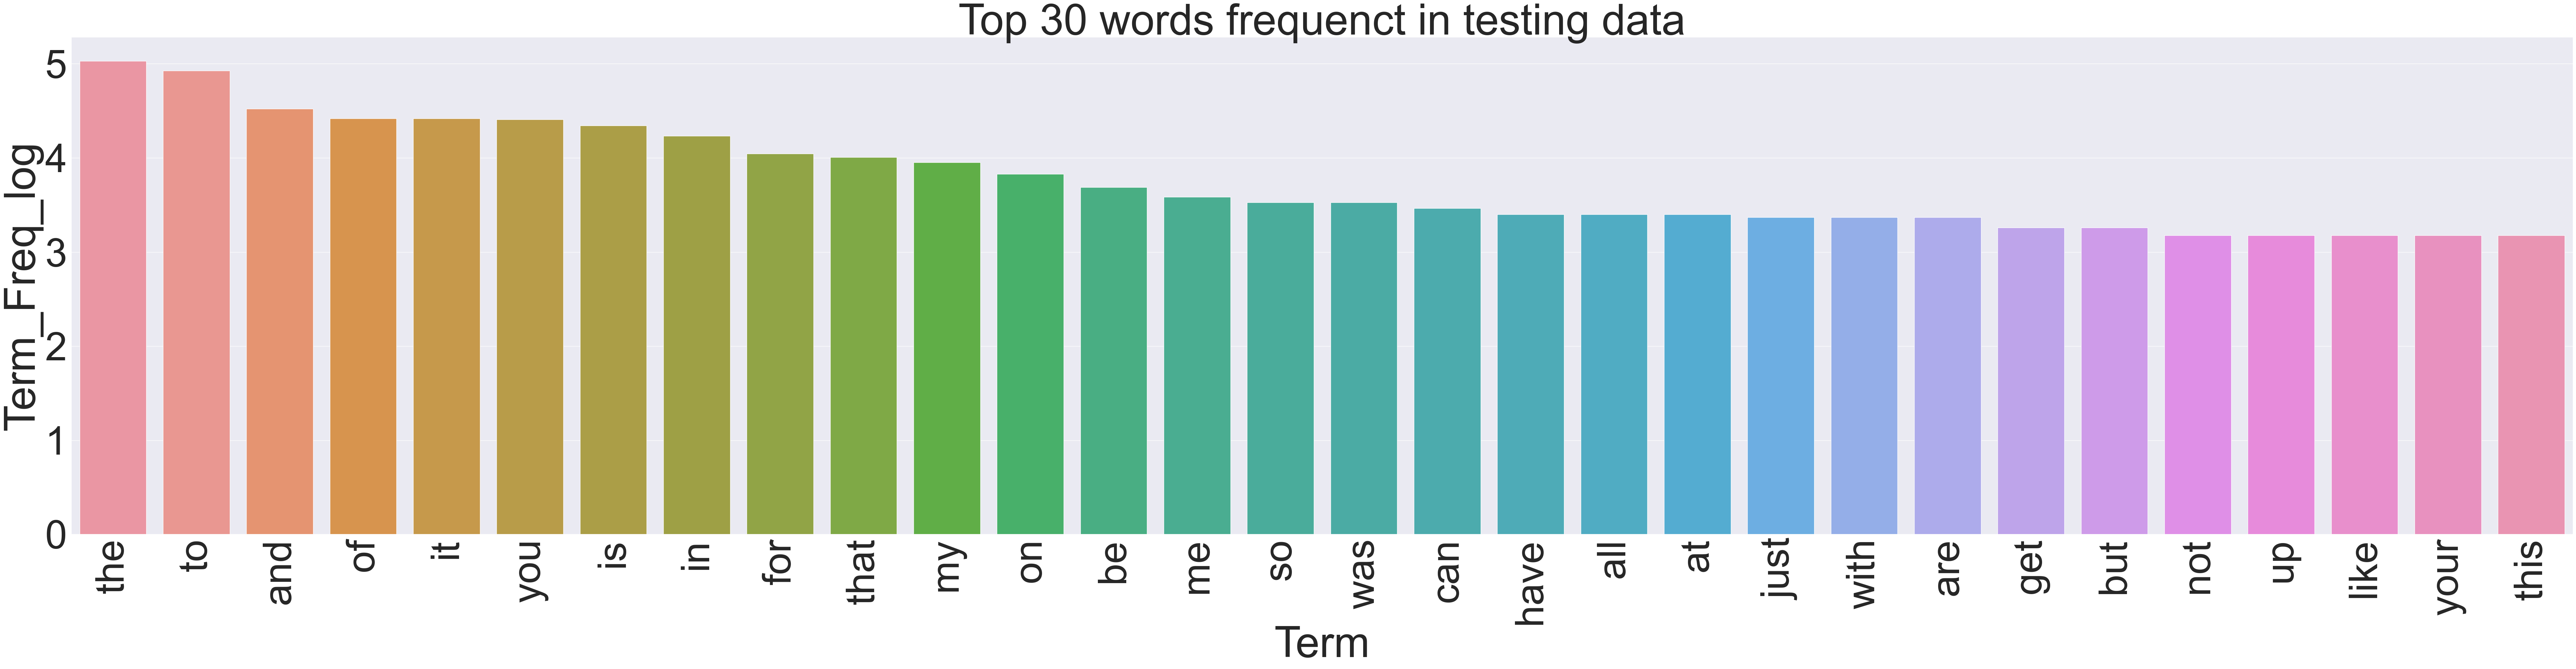

In [8]:
# Term Frequency for *** Test data ***
term_freq_test = np.asarray(test_count.sum(axis=0))[0]
term_freq_test_log = [math.log(i) for i in term_freq_test]   # for in sns.barplot

# Dataframe for plot graph
df_plotly_test = pd.DataFrame(count_vect_1.get_feature_names_out(), columns = ['Term'])
df_plotly_test['Term_Freq'] = term_freq_test
df_plotly_test['Term_Freq_log'] = term_freq_test_log

sns.set(font_scale=8) # increse font_size from defualt: 1

# Plot graph
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in testing data')

---
## Exercise 2 <a name="exercise2"></a>
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# Answer here

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000)

# Learn the vocabulary, and return document-term matrix 
z = vectorizer.fit_transform(train_df['text'])

In [10]:
# Take a look at data
vectorizer.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## Exercise 3 <a name="exercise3"></a>
Can you interpret the results above? What do they mean?

In [11]:
# Answer here


---
## Exercise 4 <a name="exercise4"></a>
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

/Users/kanokphanthananchai/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


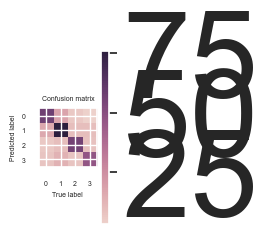

In [20]:
### Prerequisite ###
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]))
           #xticklabels = classes,
           #yticklabels = classes)
           #title = title,
           #xlabel = 'True label',
           #ylabel = 'Predicted label'
    ax.set_xlabel('True label', fontsize=5)  # Adjust the fontsize as needed
    ax.set_ylabel('Predicted label', fontsize=5)  # Adjust the fontsize as needed
    ax.set_title(title, fontsize=5)  # Adjust the fontsize as needed
    # ax.set_xticks(np.arange(len(classes)))
    # ax.set_yticks(np.arange(len(classes)))
    # ax.set_xticklabels(classes, fontsize=10)  # Adjust the fontsize as needed
    # ax.set_yticklabels(classes, fontsize=10)  # Adjust the fontsize as needed
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    

    fmt = 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt), fontsize=5, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [13]:
# Answer here
